# WORDCLOUD LIBRARY

### What is WordCloud? 

A way of showing the frequency of word of a text based on the size of each word

With this library, you can adjust: 
- The color of the cloud
- The size of the cloud
- The number of word inside the cloud
- The mask (figure)

Let's start with the basics! What should we import to use this fancy library?

In [1]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS # We will explain now the StopWord importation
import matplotlib.pyplot as plt 
from PIL import Image  # pip install pillow
import pandas as pd
import numpy as np

### OUR FIRST TEXT

In [2]:
text = "Python is a powerful and versatile programming language. You've been blessed with the Python tool! It is widely used in data science, web development and more. Python is fun to learn and very useful. I could talk about Python for a long time, I love DataFrames, libraries, functions... even the error handling, I hope to always work from this"

In [4]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

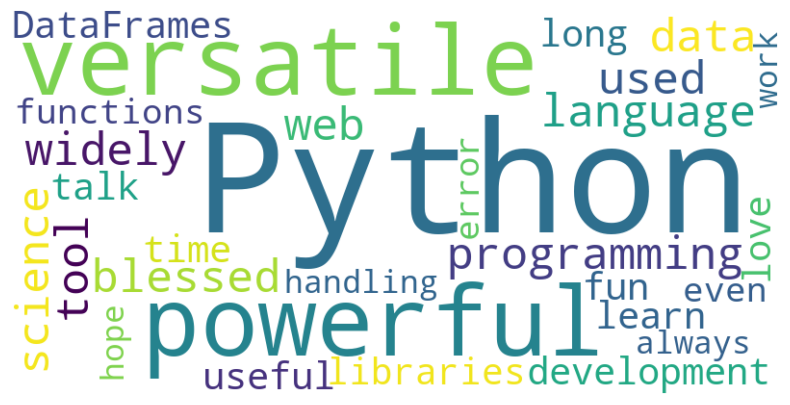

In [7]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear", cmap="viridis")
plt.axis("off")
plt.show()

### THE STOPWORD CONCEPT: The words that are not really words

In [8]:
stopwords = set(STOPWORDS)

In [9]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [10]:
stopwords.update()

In [11]:
stopwords.update(["error"])       # By using .update(), it only works with lists; we can use .add() if we want to include 'words'!!!

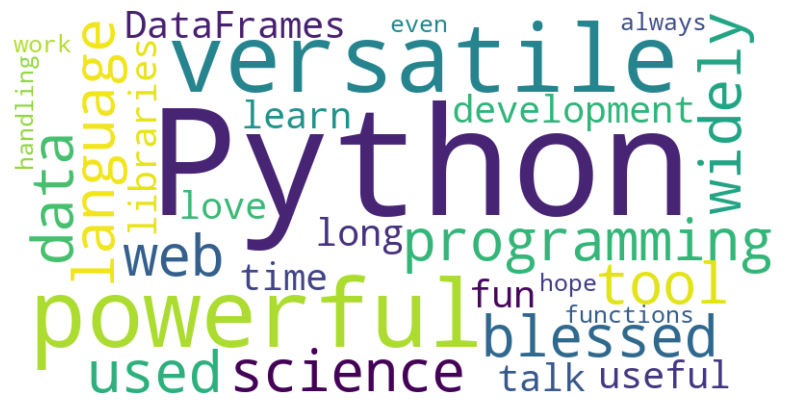

In [12]:
wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear", cmap="viridis")
plt.axis("off")
plt.show()

Let's try the same code "erasing" the stopwords in the generation of the cloud: 
By default, the Wordcloud library use the Stopwords library. BUT YOU CAN DO SOME TUNNING

What about using a text in another language?

In [13]:
texto = "Python es un lenguaje de programación poderoso y versátil. Es ampliamente utilizado en ciencia de datos, desarrollo web y más. Python es divertido de aprender y muy útil. Podría estar hablando de Python mucho rato, me encantan los DataFrames, librerías, funciones... hasta el error handling, espero trabajar siempre de esto"

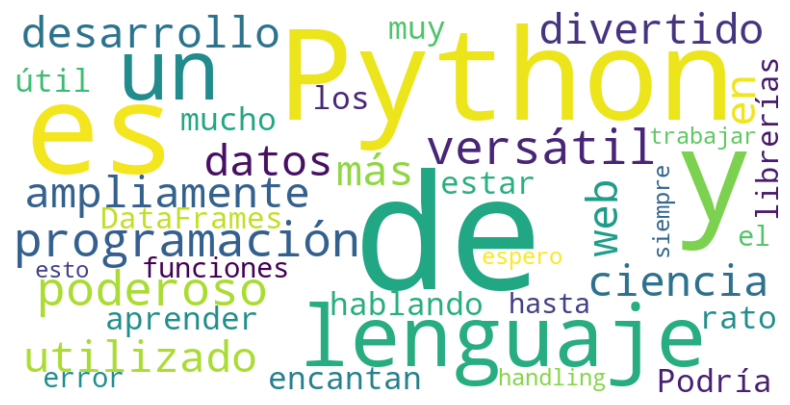

In [15]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear", cmap="viridis")
plt.axis("off")
plt.show()

In [22]:
stopwords.update(["y", "de", "muy", "hasta", "el", "error", "el", "mucho", "más", "en", "los"])

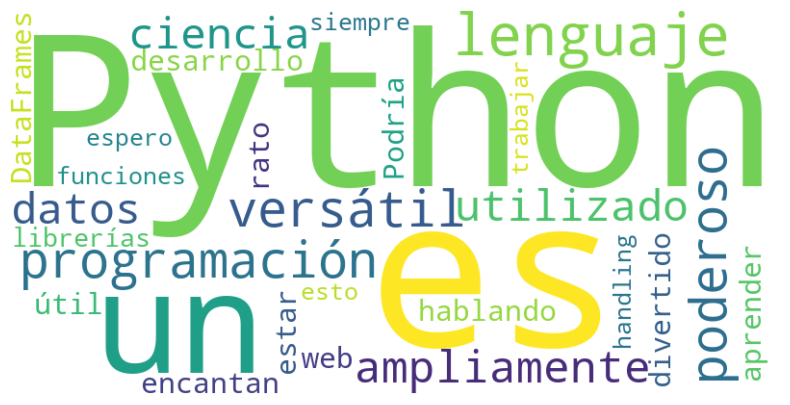

In [23]:
wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, background_color="white").generate(texto)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear", cmap="viridis")
plt.axis("off")
plt.show()

### Generate a word cloud with an external image: MASK

- The Mask MUST be in PNG format
- White background, BLACK image. 

In [24]:
mask = np.array(Image.open("Twitter.png"))

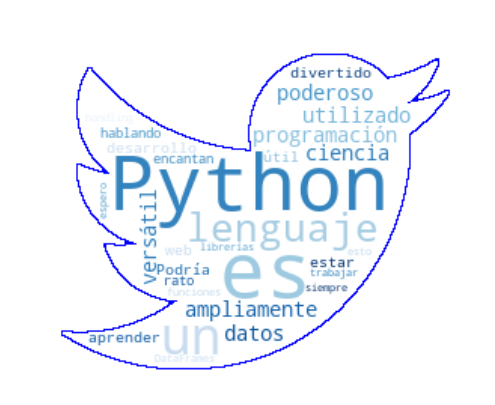

In [25]:
wordcloud = WordCloud(stopwords=stopwords, width=800, height=400, max_words=1000, mask=mask, background_color="white", colormap="Blues", contour_color="Blue", contour_width=1).generate(texto)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Now, let's use it in a longer text!**

In [26]:
text=pd.read_csv("news_articles.csv")

In [27]:
text.shape

(2096, 12)

Let's start by cleaning the column that is interesting for our purpose: text_without_stopwords

In [28]:
text.sample()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
906,wtromp@operamail.com (WT),2016-10-29T02:24:46.723+03:00,what is going on with wikileaks,new leaked clinton emails came from the device...,english,dennismichaellynch.com,http://dennismichaellynch.com/wp-content/uploa...,bs,Fake,arrested protest dakota access pipeline,audio tape hillary leaked rigging election k s...,1.0


In [ ]:
# Be careful: Use images with NOT a lot of colors or the .recolor method will not work well

## Change the png colors to be Black&White

As told you before, there is a problem with using wordcloud in a file that is not black and white. What if I want an image that don't follow this characteristics? Let's transform it!